#Required Modules

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
!pip install datasets transformers[sentencepiece]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 KB 31.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 109.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 KB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 77.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 73.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 57.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 55.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [ ]:
from transformers import pipeline

In [ ]:
import torch
device = "cuda:0" if torch.cuda.is_available() else "cpu"
device

'cuda:0'

# Goal 1

In [ ]:
# Read the file 
df = pd.read_table("https://raw.githubusercontent.com/ningxuannn/is453-data/main/Data%20collection%20-%20Goal%201.csv",
                   sep=",")
print(df.shape)


(10, 4)


In [ ]:
df.head()

,Participant No.,Time taken (1A),Time taken (1B),Would you like to choose the type of exercises to do for the game?
0,1,12,30,"No need, I think choosing easy or hard is enou..."
1,2,13,29,"No, I don't think it matters much."
2,3,20,41,"The 6 choices are too confusing, I dont unders..."
3,4,14,35,"No, I think it will be easier for me to just f..."
4,5,13,33,I think it will be fun to have variety of exer...


In [ ]:
A1 = df['Time taken (1A)']
B1 = df['Time taken (1B)']

12.8
28.8


<ipython-input-8-644d54c1eed3>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-deep')


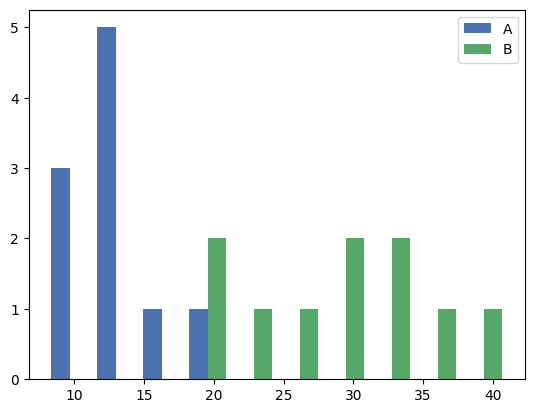

In [ ]:
print(A1.mean())
print(B1.mean())
plt.style.use('seaborn-deep')
plt.hist([A1, B1], label=['A', 'B'])
plt.legend(loc='upper right')
plt.show()

## T test

In [ ]:
alpha = 0.05
t_value,p_value=stats.ttest_rel(A1,B1)
one_tailed_p_value=float("{:.6f}".format(p_value/2)) 
print('Test statistic is %f'%float("{:.6f}".format(t_value)))
print('p-value for one_tailed_test is %f'%one_tailed_p_value)

if one_tailed_p_value<=alpha:

    print('Conclusion','n','Since p-value(=%f)'%one_tailed_p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0. 
Hence, we can conclude that there is a difference in the task completion time between Version A and Version B, 
with Version A taking a shorter time compared to Version B. i.e., d = 0 at %.2f level of significance.'''%alpha)

else:
    print('Conclusion','n','Since p-value(=%f)'%one_tailed_p_value,'>','alpha(=%.2f)'%alpha,'''We do not reject the null hypothesis H0.''')


Test statistic is -11.251374
p-value for one_tailed_test is 0.000001
Conclusion n Since p-value(=0.000001) < alpha(=0.05) We reject the null hypothesis H0. 
Hence, we can conclude that there is a difference in the task completion time between Version A and Version B, 
with Version A taking a shorter time compared to Version B. i.e., d = 0 at 0.05 level of significance.


In [ ]:
# Load the "sentiment prediction" model.
classifier = pipeline("sentiment-analysis", device = 0)
# input: sentence, output: sentiment lable and score
classifier("I've been waiting for a HuggingFace course my whole life.")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'label': 'POSITIVE', 'score': 0.9598046541213989}]

In [ ]:
sentences = list(df['Would you like to choose the type of exercises to do for the game?'].values)

In [ ]:
sentences[0]

'No need, I think choosing easy or hard is enough for me.'

In [ ]:
aspect_classifier = pipeline("zero-shot-classification", device=0)
aspect_result = aspect_classifier(list(sentences), candidate_labels=['yes', 'no'],)

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:640: UserWarning: Length of IterableDataset <transformers.pipelines.pt_utils.PipelineChunkIterator object at 0x7f67d40716a0> was reported to be 10 (when accessing len(dataloader)), but 11 samples have been fetched. 
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:640: UserWarning: Length of IterableDataset <transformers.pipelines.pt_utils.PipelineChunkIterator object at 0x7f67d40716a0> was reported to be 10 (when accessing len(dataloader)), but 12 samples have been fetched. 
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:640: UserWarning: Length of IterableDataset <transformers.pipelines.pt_utils.PipelineChunkIterator object at 0x7f67d40716a0> was reported to be 10 (when accessing len(dataloader)), but 13 samples have been fetched. 
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataload

In [ ]:
aspect_result[0]

{'sequence': 'No need, I think choosing easy or hard is enough for me.',
 'labels': ['no', 'yes'],
 'scores': [0.9881142377853394, 0.011885786429047585]}

In [ ]:
aspect_result

[{'sequence': 'No need, I think choosing easy or hard is enough for me.',
  'labels': ['no', 'yes'],
  'scores': [0.9881142377853394, 0.011885786429047585]},
 {'sequence': "No, I don't think it matters much.",
  'labels': ['no', 'yes'],
  'scores': [0.9817317724227905, 0.018268220126628876]},
 {'sequence': 'The 6 choices are too confusing, I dont understand why I need so many different exercises.',
  'labels': ['no', 'yes'],
  'scores': [0.850425660610199, 0.14957427978515625]},
 {'sequence': 'No, I think it will be easier for me to just follow what the screen suggests for me to do everyday.',
  'labels': ['no', 'yes'],
  'scores': [0.9934095144271851, 0.006590492557734251]},
 {'sequence': 'I think it will be fun to have variety of exercises, but I am not very clear on what I should choose everyday.',
  'labels': ['yes', 'no'],
  'scores': [0.5187734961509705, 0.48122650384902954]},
 {'sequence': 'I do not really have a preference, as long as I exercise, I dont think its important.',
 

In [ ]:
np.argmax(aspect_result[0]['scores']) 

0

In [ ]:
aspect_result[0]['labels']

['no', 'yes']

In [ ]:
x = [result['labels'][np.argmax(result['scores'])] for result in aspect_result]
y = [result['scores'][np.argmax(result['scores'])] for result in aspect_result]

In [ ]:
# x=[]
# y=[]
# for result in aspect_result:
#   for label in result['labels']:
#     x.append(label)
#   for score in result['scores']:
#     y.append(score)
  

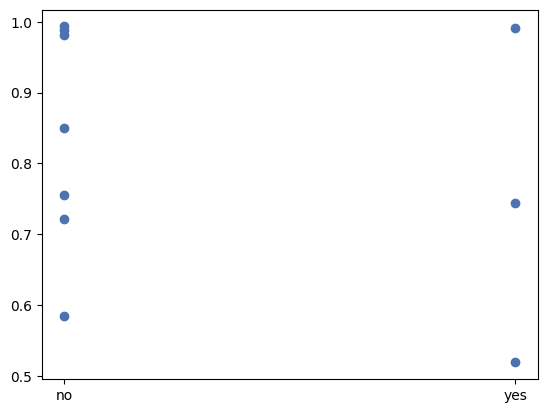

In [ ]:
plt.scatter(x,y)



# Goal 2

In [ ]:
from scipy.stats import ttest_rel

In [ ]:
df2 = pd.read_table("https://raw.githubusercontent.com/ningxuannn/is453-data/main/Data%20collection%20-%20Goal%202.csv",
                   sep=",")

In [ ]:
df2.head()

,Participant No.,Time taken (2A),Time taken (2B),Preference for QR code scanner or passcode
0,1,6,16,"QR code, it was easier to do since I only need..."
1,2,5,17,"QR code, it was more convenient to use."
2,3,7,18,"I prefer using the QR, the passcode is too com..."
3,4,5,16,"As long as my camera is working, I think QR wi..."
4,5,6,15,"I dont really have any preferences, both are q..."


In [ ]:
A = df2['Time taken (2A)']
B = df2['Time taken (2B)']

In [ ]:
print(A.mean())
print(B.mean())

5.5
14.2


<ipython-input-33-463054ac667b>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-deep')


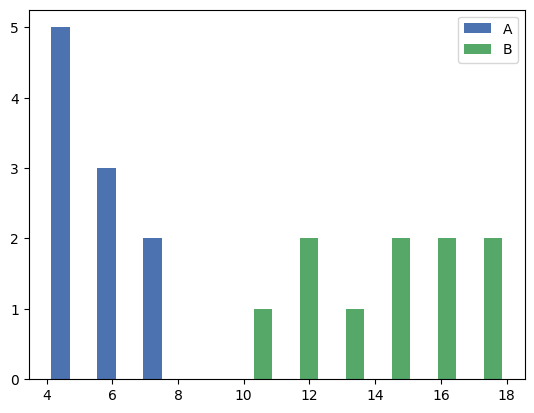

In [ ]:

plt.style.use('seaborn-deep')
plt.hist([A, B], label=['A', 'B'])
plt.legend(loc='upper right')
plt.show()

In [ ]:
alpha = 0.05
t_value,p_value=stats.ttest_rel(A,B)
one_tailed_p_value=float("{:.6f}".format(p_value/2)) 
print('Test statistic is %f'%float("{:.6f}".format(t_value)))
print('p-value for one_tailed_test is %f'%one_tailed_p_value)

if one_tailed_p_value<=alpha:

    print('Conclusion','n','Since p-value(=%f)'%one_tailed_p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0. 
Hence, we can conclude that there is a difference in the task completion time between Version A and Version B, 
with Version A taking a shorter time compared to Version B. i.e., d = 0 at %.2f level of significance.'''%alpha)

else:
    print('Conclusion','n','Since p-value(=%f)'%one_tailed_p_value,'>','alpha(=%.2f)'%alpha,'''We do not reject the null hypothesis H0.''')

# Goal 3

In [ ]:
df3 = pd.read_table("https://raw.githubusercontent.com/ningxuannn/is453-data/main/Data%20collection%20-%20Goal%203%20(1).csv",
                   sep=",")

In [ ]:
df3.head()

,Participant No.,Day 1,Day 2,Day 3,Why did you choose [XXX] options the past 3 days?
0,1,Easy,Easy,Easy,I did not think so much into the choices that ...
1,2,Easy,Easy,Easy,"I have some knee problems, I am scared that th..."
2,3,Easy,Medium,Medium,I think I need to get used to the exercises fi...
3,4,Easy,Easy,Easy,"I will just click on the same as yesterday, it..."
4,5,Easy,Easy,Easy,I think it is good enough that I do the exerci...


In [ ]:
day1=df3["Day 1"]
day2=df3["Day 2"]
day3=df3["Day 3"]

In [ ]:
three_days=0
two_days=0
no_days=0
for i in range(len(df3)):
  if day1[i] in day2[i] and day1[i] in day3[i]:
    three_days += 1
  elif day1[i] in day2[i] or day2[i] in day3[i]:
    two_days+=1
  else:
    no_days+=1

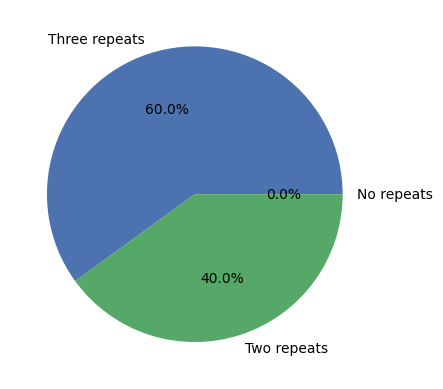

In [ ]:
y = np.array([three_days, two_days, no_days])
mylabels = ["Three repeats", "Two repeats", "No repeats"]

plt.pie(y, labels = mylabels,autopct='%1.1f%%')
plt.show() 

In [ ]:
from tabulate import tabulate
table = [mylabels, y]
print(tabulate(table))

-------------  -----------  ----------
Three repeats  Two repeats  No repeats
6              4            0
-------------  -----------  ----------
